In [11]:
import random
import simpy
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt

from util import Time, combine_income_outcome_flows
from config import scenario
from plot import plot_income_outcome_flow
from main import investment, sale, bankruptcy, pay_salary, investor_money_flow
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
SEED = 1234
random.seed(SEED)

In [9]:
env = simpy.Environment()

for venture_fund, companies in scenario(1):
    env.process(investment(env, venture_fund, companies))
    env.process(sale(env, venture_fund))
    env.process(bankruptcy(env, venture_fund))
    env.process(pay_salary(env, venture_fund))
    env.process(investor_money_flow(env, venture_fund))

env.run(until=10 * Time.Year)

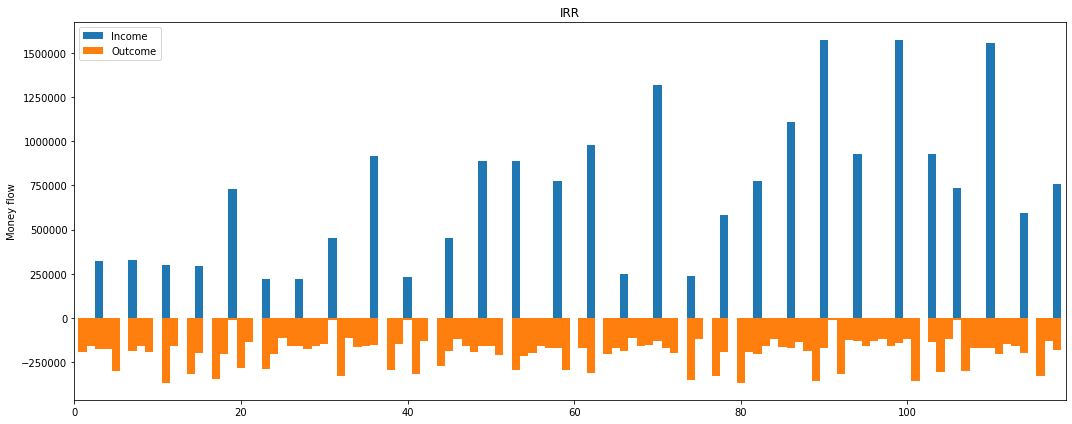

In [10]:
plot_income_outcome_flow(venture_fund.res_income_flow, venture_fund.res_outcome_flow)

In [15]:
irr_array = combine_income_outcome_flows(venture_fund.res_income_flow, venture_fund.res_outcome_flow)

In [16]:
print("Resulting Internal Rate of Return is:")
np.irr(irr_array)

Resulting Internal Rate of Return is:


/home/kenenbek/data/anaconda3/envs/change-point/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  


0.0028681881353114225